## Before you start :
   - These exercises are related to the Exploratory data analysis using matplotlib and seaborn.
   - The datasets for Challenge 2 and 3 are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

# Challenge 1

Answer all questions by drawing a graph. Then explain.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

**0. Load seaborn dataset "tips"**

In [4]:
sns.load_dataset("tips")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [47]:
bar = sns.load_dataset("tips")

In [50]:
bar.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

**1. What is the prefered day for eating?**

<AxesSubplot:xlabel='day', ylabel='count'>

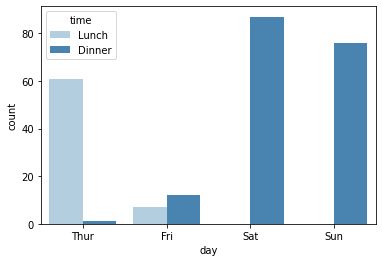

In [46]:
sns.countplot(x=bar.day, hue = bar.time, palette="Blues")

In [ ]:
Los jueves es el día en el que se come más en vez de cenar.

**2. What days of the week has more men than women payers?**

<AxesSubplot:xlabel='day', ylabel='count'>

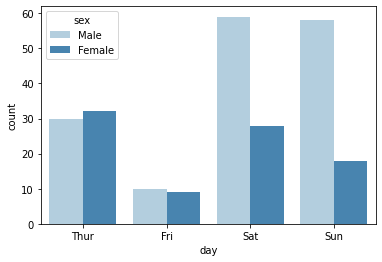

In [120]:
sns.countplot(x=bar.day, hue = bar.sex, palette="Blues")

Los viernes, los s´çabados y los domingos.

**3. Do you think bill amounts change considerably depending on smoking?**

In [113]:
bar.loc[(bar.smoker == True) & (bar.total_bill)]

,total_bill,tip,sex,smoker,day,time,size


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

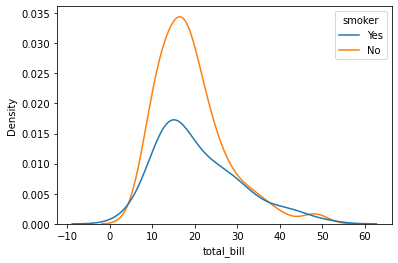

In [92]:
sns.kdeplot(x = bar.total_bill, hue = bar.smoker)

**4. Is tip correlated to total_bill? Draw a scatter plot**

In [118]:
bar.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

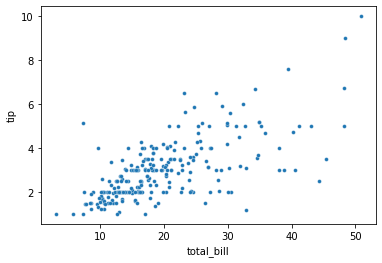

In [119]:
sns.scatterplot(x = bar.total_bill, y = bar.tip, s = 15)

Las propinas si que están correlacionadas a las cuentas, pero podemos observar como cuanto mayor es la cuenta aumenta la dispersión, o lo que es lo mismo cuanto más pagas en la factura, más te duele dejar algo proporcional.

**BONUS**: Draw a graph of your choice with 2 numerical variables and 2 categorical variable (HINT: use `hue` and `style`). Do you find it useful?

In [194]:
bar.head()

,total_bill,tip,sex,smoker,day,time,size,gasto_persona
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


In [196]:
bar[['gasto_persona', 'tip', 'sex']]

,gasto_persona,tip,sex
0,8.495000,1.01,Female
1,3.446667,1.66,Male
2,7.003333,3.50,Male
3,11.840000,3.31,Male
4,6.147500,3.61,Female
...,...,...,...
239,9.676667,5.92,Male
240,13.590000,2.00,Female
241,11.335000,2.00,Male
242,8.910000,1.75,Male


In [134]:
bar['gasto_persona'] = bar.total_bill / bar['size']

<AxesSubplot:ylabel='Density'>

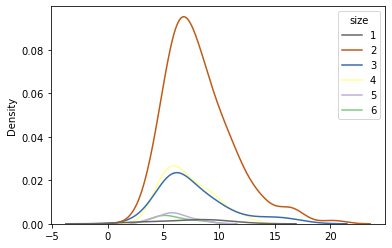

In [176]:
sns.kdeplot(bar.gasto_persona, hue = bar['size'], palette='Accent_r')

In [188]:
bar[bar['size'] == 2].sum()

total_bill       2565.890
tip               402.840
size              312.000
gasto_persona    1282.945
dtype: float64

In [193]:
bar.loc[bar['size']!= 2].sum()

total_bill       2261.880
tip               328.740
size              315.000
gasto_persona     641.783
dtype: float64

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

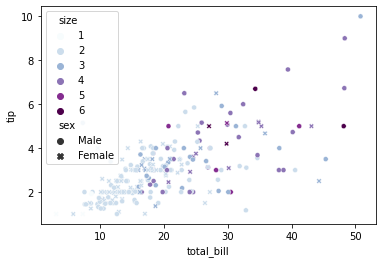

In [174]:
sns.scatterplot(x = bar.total_bill, y = bar.tip, hue = bar['size'], style = bar.sex , s = 25, palette = 'BuPu', legend = 'brief')